# 2. CLEANSED LAYER

In [1]:
import pandas as pd
import pandasql as psql

In [4]:
path_raw = 'C:\\Users\\anton\\OneDrive\\Documentos\\GitHub\\UniversityHack2024\\01_Data\\01_Raw\\'
path_cleansed = 'C:\\Users\\anton\\OneDrive\\Documentos\\GitHub\\UniversityHack2024\\01_Data\\02_Cleansed\\'

## 2.1 OF 123456.xlsx

In [5]:
# Ruta Excel para OF 123456
path_OF_01 = path_raw + 'OF 123456.xlsx'

In [ ]:
# Guardamos el contenido en un DataFrame
df_OF_01 = pd.read_excel(path_OF_01)
print(df_OF_01.dtypes)

In [5]:
# La consulta convierte el campo Lote a entero eliminando las barras ('/'), y cambiamos el nombre de las demás columnas.
consulta = """
    SELECT 
    CAST(REPLACE(`Lote`, '/', '') AS INTEGER) AS Lote, 
    Orden AS OF,
    `Cantidad entregada` AS Cantidad_entregada

    FROM df
    """
# Ejecutamos la consulta
df_OF_02 = psql.sqldf(consulta, locals())

In [ ]:
# Guardar el resultado en un archivo Excel
df_OF_02.to_excel(f'{path_cleansed}OF_123456.xlsx', index=False)

# Mostrar el resultado
display(df_OF_02)

## 2.2 Fases producción.xlsx

In [10]:
# Ruta Excel para Fases de producción
path_fases_01 = path_raw + 'Fases producción.xlsx'

### 2.2.1 PREINÓCULO

In [ ]:
# Leer el archivo Excel y guardar el contenido en un DataFrame
df_preinoculo_01 = pd.read_excel(path_fases_01, sheet_name = "Preinóculo")
display(df_preinoculo_01.dtypes)

In [ ]:
# Convertimos la columnas 'ph_línea 3' y 'turbidez_línea 3' a numérico y forzamos los valores no numéricos a NaN
df_preinoculo_01['ph_línea 3'] = pd.to_numeric(df_preinoculo_01['ph_línea 3'], errors='coerce')
df_preinoculo_01['turbidez_línea 3'] = pd.to_numeric(df_preinoculo_01['turbidez_línea 3'], errors='coerce')
print(df_preinoculo_01.dtypes)

In [ ]:
df_preinoculo_01.to_excel(f'{path_cleansed}Fases producción_Preinóculo.xlsx', index=False)

### 2.2.2 INÓCULO

In [ ]:
# Leer el archivo Excel y guardar el contenido en un DataFrame
df_inoculo_01 = pd.read_excel(path_fases_01, sheet_name = "Inóculo")
display(df_inoculo_01.dtypes)

In [ ]:
df_inoculo_01.to_excel(f'{path_cleansed}Fases producción_Inóculo.xlsx', index=False)

### 2.2.3 CULTIVO FINAL

In [ ]:
# Leemos el archivo Excel y guardamos el contenido en un DataFrame
df_cultivo_01 = pd.read_excel(path_fases_01, sheet_name = "Cultivo final")

In [ ]:
# La consulta convierte los campos Lote, Turbidez y Glucosa g/L a valores numéricos, manejando excepciones como NULL.
consulta = """
    SELECT 
        CAST(Lote AS Integer) AS Lote,
        Fecha,
        CAST(NULLIF(Turbidez, '-') AS Float) AS Turbidez,
        Viabilidad,
        CASE
            WHEN `Glucosa g/L` REGEXP '^[0-9]+\\.[0-9]+$' THEN CAST(`Glucosa g/L` AS Float)
            ELSE NULL
        END AS Glucosa
    FROM df_cultivoIPC_01
"""
df_cultivo_02 = psql.sqldf(consulta, locals())

# Cambiamos, con la librería pandas, el tipo de campo 'Fecha' a DATETIME porque la librería pandasql no tiene la función
df_cultivo_02['Fecha'] = pd.to_datetime(df_cultivo_02['Fecha'])

In [ ]:
# Guardamos el resultado en un archivo Excel
df_cultivo_02.to_excel(f'{path_cleansed}Fases producción_Cultivo final.xlsx', index=False)

## 2.3 Fases producción_test.xlsx

In [23]:
# Ruta Excel para Fases de producción_test
path_cultivotest_01 = path_raw + 'Fases producción_test.xlsx'

In [24]:
# Leer el archivo Excel y guardar el contenido en un DataFrame
df_cultivotest_01 = pd.read_excel(path_cultivotest_01)
# Eliminar la columna 'Producto 2'
df_cultivotest_02 = df_cultivotest_01.drop(columns=['Producto 2'])

In [ ]:
df_cultivotest_02.to_excel(f'{path_cleansed}Fases producción_test_Cultivo final.xlsx', index=False)

## 2.4 Cinéticos IPC.xlsx

In [26]:
# Ruta Excel para Cinéticos IPC
path_IPC_01 = path_raw + 'Cinéticos IPC.xlsx'

### 2.4.1 INÓCULO

In [ ]:
df_inoculoIPC_01 = pd.read_excel(path_IPC_01, sheet_name = 'Inóculos')
print(df_inoculoIPC_01.dtypes)

In [ ]:
df_inoculoIPC_01.to_excel(f'{path_cleansed}CineticosIPC_Inoculos.xlsx', index=False)

### 2.4.2 CULTIVO FINAL

In [ ]:
# Leemos el archivo Excel y guardamos el contenido en un DataFrame
df_cultivoIPC_01 = pd.read_excel(path_IPC_01, sheet_name='Cultivos finales')

In [ ]:
# La consulta convierte los campos Lote, Turbidez y Glucosa g/L a valores numéricos, manejando excepciones como NULL.
consulta = """
    SELECT 
        CAST(Lote AS Integer) AS Lote,
        Fecha,
        CAST(NULLIF(Turbidez, '-') AS Float) AS Turbidez,
        Viabilidad,
        CASE
            WHEN `Glucosa g/L` REGEXP '^[0-9]+\\.[0-9]+$' THEN CAST(`Glucosa g/L` AS Float)
            ELSE NULL
        END AS Glucosa
    FROM df_cultivoIPC_01
"""
df_cultivoIPC_02 = psql.sqldf(consulta, locals())

# Cambiamos, con la librería pandas, el tipo de campo 'Fecha' a DATETIME porque la librería pandasql no tiene la función
df_cultivoIPC_02['Fecha'] = pd.to_datetime(df_cultivoIPC_02['Fecha'])

In [ ]:
# Guardamos el resultado en un archivo Excel
df_cultivoIPC_02.to_excel(f'{path_cleansed}CineticosIPC_Cultivos.xlsx', index=False)

# Mostrar el resultado
display(df_cultivoIPC_02)

### 2.4.3 CENTRIFUGACIÓN

In [ ]:
df_centIPC_01 = pd.read_excel(path_IPC_01, sheet_name = 'Centrifugación')
print(df_centIPC_01.dtypes)

In [ ]:
df_centIPC_01.to_excel(f'{path_cleansed}CineticosIPC_Centrifugacion.xlsx', index=False)

## 2.5 Horas inicio fin centrífugas.xlsx

In [32]:
path_horascentrifuga_01 = path_raw + 'Horas inicio fin centrífugas.xlsx'

In [ ]:
df_horascentrifuga_01 = pd.read_excel(path_horascentrifuga_01)
print(df_horascentrifuga_01.dtypes)

In [ ]:
df_horascentrifuga_01.to_excel(f'{path_cleansed}Centrifugacion.xlsx')

## 2.6 Biorreactores

### 2.6.1 Grandes (13169, 13170, 14614, 14615, 14616, 14617)

In [ ]:
# Juntamos, en primer lugar, los Excel de los diferentes biorreactores grandes en un sólo Excel
# A continuación, añadimos una columna con el ID de cada biorreactor
path_biograndes_01 = path_raw + 'biorreactores_grandes.xlsx'

df_biograndes_01 = pd.read_excel(path_biograndes_01)
print(df_biograndes_01.dtypes)

In [7]:
# Cambiamos el tipo de columna 'DateTime' a tipo DateTime
df_biograndes_01['DateTime'] = pd.to_datetime(df_biograndes_01['DateTime'])
# Añadimos la columna con el ID de cada Biorreactor
df_biograndes_01.columns = [col if col in ['DateTime', 'Numero_Biorreactor'] else col.split('.')[1] for col in df_biograndes_01.columns]

In [ ]:
df_biograndes_01.to_excel(f'{path_cleansed}biorreactores_grandes.xlsx', index=False)

### 2.6.2 Pequeños (13171, 13172, 14618)

In [ ]:
# Repetimos el proceso anterior con los biorreactores pequeños
path_biopequenyos_01 = path_raw + 'biorreactores_pequeños.xlsx'

df_biopequenyos_01 = pd.read_excel(path_biopequenyos_01)

In [11]:
# Cambiamos el tipo de columna 'DateTime' a tipo DateTime
df_biopequenyos_01['DateTime'] = pd.to_datetime(df_biopequenyos_01['DateTime'])
# Añadimos la columna con el ID de cada Biorreactor
df_biopequenyos_01.columns = [col if col in ['DateTime', 'Numero_Biorreactor'] else col.split('.')[1] for col in df_biopequenyos_01.columns]

In [ ]:
df_biopequenyos_01.to_excel(f'{path_cleansed}biorreactores_pequeños.xlsx')

## 2.7 Centrifugadoras

In [ ]:
# Seguimos un proceso análogo al llevado a cabo con los biorreactores
path_centrifugadoras_01 = path_raw + 'centrifugadoras.xlsx'

df_centrifugadoras_01 = pd.read_excel(path_centrifugadoras_01)

In [ ]:
# Cambiamos el tipo de columna 'DateTime' a tipo DateTime
df_centrifugadoras_01['DateTime'] = pd.to_datetime(df_centrifugadoras_01['DateTime'])
# Cambiamos el nombre de las columnas
df_centrifugadoras_01 = df_centrifugadoras_01.rename(columns={'17825_D01919022.PV': 'velocidad_separación', '17825_D01916503.PV': 'presion_agua', '17825_D01916047.PV': 'contrapresion', '17825_D01906041.PV': 'caudal', '17825_D01780551.PV': 'apertura_valvula_agua', '17825_CTF0101.EN_Total': 'descargas_totales', '17825_CTF0101.EN_Parcial': 'descargas parciales'})


In [ ]:
df_centrifugadoras_01.to_excel(f'{path_cleansed}centrifugadoras.xlsx')

## 2.8 Temperatura y humedades.xlsx

In [16]:
path_temperatura_01 = path_raw + 'Temperaturas y humedades.xlsx'

df_temperatura_01 = pd.read_excel(path_temperatura_01)

In [ ]:
# Cambiamos el tipo de columna 'DateTime' a tipo DateTime
df_temperatura_01['DateTime'] = pd.to_datetime(df_temperatura_01['DateTime'])

In [ ]:
df_temperatura_01.to_excel(f'{path_cleansed}temperaturas_humedades.xlsx')

# 3. STRUCTURED

In [1]:
import pandas as pd
import pandasql as psql
import numpy as np

In [2]:
path_cleansed = 'C:\\Users\\anton\\OneDrive\\Documentos\\GitHub\\UniversityHack2024\\data\\02_cleansed\\'
path_structured = 'C:\\Users\\anton\\OneDrive\\Documentos\\GitHub\\UniversityHack2024\\data\\03_structured\\'

## 3.1 PREINÓCULO

In [ ]:
path_preinoculo_02 = path_cleansed + 'Fases producción_Preinóculo.xlsx'

df_preinoculo_02 = pd.read_excel(path_preinoculo_02)

In [ ]:
# creamos columna de tiempo en horas
df_preinoculo_02['horas_totales_preinoculo'] = (df_preinoculo_02['Fecha/hora fin'] - df_preinoculo_02['Fecha/hora inicio']).dt.total_seconds() / 3600
# eliminamos las fechas
df_preinoculo_02 = df_preinoculo_02.drop(['Fecha/hora inicio', 'Fecha/hora fin'], axis=1)

In [ ]:
# Crear listas para almacenar los pH y turbidez seleccionados
ph_usados = []
turbidez_usados = []

# Iterar sobre cada fila del DataFrame
for i, row in df_preinoculo_02.iterrows():
    # Crear un DataFrame temporal con los pH, turbidez y líneas utilizadas de esa fila
    temp_df = pd.DataFrame({
        'ph': [row['ph_línea 1'], row['ph_línea 2'], row['ph_línea 3']],
        'turbidez': [row['turbidez_línea 1'], row['turbidez_línea 2'], row['turbidez_línea 3']],
        'utilizada': [row['linea_utilizada_línea 1'], row['linea_utilizada_línea 2'], row['linea_utilizada_línea 3']]
    })
    
    # Filtrar los tubos que se utilizan
    tubos_usados = temp_df[temp_df['utilizada'] == 1]
    
    # Tomar los valores de pH y turbidez de los tubos utilizados
    ph_usados.append(tubos_usados['ph'].values)
    turbidez_usados.append(tubos_usados['turbidez'].values)

# Agregar los valores seleccionados al DataFrame original
df_preinoculo_02['ph_usado_1'] = [x[0] if len(x) > 0 else np.nan for x in ph_usados]
df_preinoculo_02['ph_usado_2'] = [x[1] if len(x) > 1 else np.nan for x in ph_usados]
df_preinoculo_02['turbidez_usada_1'] = [x[0] if len(x) > 0 else np.nan for x in turbidez_usados]
df_preinoculo_02['turbidez_usada_2'] = [x[1] if len(x) > 1 else np.nan for x in turbidez_usados]

In [ ]:
df_preinoculo_03 = df_preinoculo_02.drop(['ph_línea 1', 'ph_línea 2', 'ph_línea 3', 'turbidez_línea 1', 'turbidez_línea 2', 'turbidez_línea 3', 'linea_utilizada_línea 1', 'linea_utilizada_línea 2', 'linea_utilizada_línea 3'], axis=1)

In [ ]:
df_preinoculo_03.to_excel(f'{path_structured}preinoculo_total.xlsx', index=False)

## 3.2 INÓCULO

In [ ]:
path_inoculoIPC_02 = path_cleansed + 'CineticosIPC_Inoculos.xlsx'
path_inoculo_02 = path_cleansed + 'Fases producción_Inóculo.xlsx'
path_biopequenyos_02 = path_cleansed + 'biorreactores_pequeños.xlsx'

df_inoculoIPC_02 = pd.read_excel(path_inoculoIPC_02)
df_inoculo_02 = pd.read_excel(path_inoculo_02)
df_biopequenyos_02 = pd.read_excel(path_biopequenyos_02)

In [ ]:
df_agrupado = df_inoculoIPC_02.groupby('Lote').agg({
    'Turbidez': ['mean', 'std', 'min', 'max'],
    'Viabilidad': ['mean', 'std', 'min', 'max']
}).reset_index()

In [ ]:
# renombramos columnas
df_agrupado.columns = ['_'.join(col).strip() for col in df_agrupado.columns.values]
df_agrupado = df_agrupado.rename(columns={'Lote_': 'LOTE'})

In [ ]:
df_final = pd.merge(df_inoculo_02, df_agrupado, on='LOTE', how='outer')

In [ ]:
pysqldf = lambda q: psql(q, globals())

query = '''
    SELECT
        l."LOTE",
        AVG(b.Agitation_PV) AS avg_Agitation_PV,
        MIN(b.Agitation_PV) AS min_Agitation_PV,
        MAX(b.Agitation_PV) AS max_Agitation_PV,

        AVG(b.Air_Sparge_PV) AS avg_Air_Sparge_PV,
        MIN(b.Air_Sparge_PV) AS min_Air_Sparge_PV,
        MAX(b.Air_Sparge_PV) AS max_Air_Sparge_PV,
        
        AVG(b.Biocontainer_Pressure_PV) AS avg_Biocontainer_Pressure_PV,
        MIN(b.Biocontainer_Pressure_PV) AS min_Biocontainer_Pressure_PV,
        MAX(b.Biocontainer_Pressure_PV) AS max_Biocontainer_Pressure_PV,

        AVG(b.DO_1_PV) AS avg_DO_1_PV,
        MIN(b.DO_1_PV) AS min_DO_1_PV,
        MAX(b.DO_1_PV) AS max_DO_1_PV,

        AVG(b.DO_2_PV) AS avg_DO_2_PV,
        MIN(b.DO_2_PV) AS min_DO_2_PV,
        MAX(b.DO_2_PV) AS max_DO_2_PV,

        AVG(b.Gas_Overlay_PV) AS avg_Gas_Overlay_PV,
        MIN(b.Gas_Overlay_PV) AS min_Gas_Overlay_PV,
        MAX(b.Gas_Overlay_PV) AS max_Gas_Overlay_PV,

        AVG(b.Load_Cell_Net_PV) AS avg_Load_Cell_Net_PV,
        MIN(b.Load_Cell_Net_PV) AS min_Load_Cell_Net_PV,
        MAX(b.Load_Cell_Net_PV) AS max_Load_Cell_Net_PV,

        AVG(b.pH_1_PV) AS avg_pH_1_PV,
        MIN(b.pH_1_PV) AS min_pH_1_PV,
        MAX(b.pH_1_PV) AS max_pH_1_PV,

        AVG(b.pH_2_PV) AS avg_pH_2_PV,
        MIN(b.pH_2_PV) AS min_pH_2_PV,
        MAX(b.pH_2_PV) AS max_pH_2_PV,

        AVG(b.PUMP_1_PV) AS avg_PUMP_1_PV,
        MIN(b.PUMP_1_PV) AS min_PUMP_1_PV,
        MAX(b.PUMP_1_PV) AS max_PUMP_1_PV,

        AVG(b.PUMP_1_TOTAL) AS avg_PUMP_1_TOTAL,
        MIN(b.PUMP_1_TOTAL) AS min_PUMP_1_TOTAL,
        MAX(b.PUMP_1_TOTAL) AS max_PUMP_1_TOTAL,

        AVG(b.PUMP_2_PV) AS avg_PUMP_2_PV,
        MIN(b.PUMP_2_PV) AS min_PUMP_2_PV,
        MAX(b.PUMP_2_PV) AS max_PUMP_2_PV,

        AVG(b.PUMP_2_TOTAL) AS avg_PUMP_2_TOTAL,
        MIN(b.PUMP_2_TOTAL) AS min_PUMP_2_TOTAL,
        MAX(b.PUMP_2_TOTAL) AS max_PUMP_2_TOTAL,

        AVG(b.Single_Use_DO_PV) AS avg_Single_Use_DO_PV,
        MIN(b.Single_Use_DO_PV) AS min_Single_Use_DO_PV,
        MAX(b.Single_Use_DO_PV) AS max_Single_Use_DO_PV,

        AVG(b.Single_Use_pH_PV) AS avg_Single_Use_pH_PV,
        MIN(b.Single_Use_pH_PV) AS min_Single_Use_pH_PV,
        MAX(b.Single_Use_pH_PV) AS max_Single_Use_pH_PV,

        AVG(b.Temperatura_PV) AS avg_Temperatura_PV,
        MIN(b.Temperatura_PV) AS min_Temperatura_PV,
        MAX(b.Temperatura_PV) AS max_Temperatura_PV
    FROM
        df_final l
    LEFT JOIN
        df_biopequenyos_02 b
    ON
        l."ID bioreactor" = b.Numero_Biorreactor
        AND b.DateTime BETWEEN l."Fecha/hora inicio" AND l."Fecha/hora fin"
    GROUP BY
        l."LOTE";
'''

resultado = pysqldf(query)

In [ ]:
consulta = """
    SELECT *
    FROM df_final
    LEFT JOIN resultado
    ON df_final.LOTE = resultado.LOTE
    """

In [ ]:
resultadofinal = psql.sqldf(consulta, locals())

In [ ]:
resultadofinal.drop(columns=['LOTE.1'], inplace=True)

In [ ]:
resultadofinal['horas_totales_inoculo'] = (resultadofinal['Fecha/hora fin'] - resultadofinal['Fecha/hora inicio']).dt.total_seconds() / 3600

In [ ]:
resultadofinal = resultadofinal.drop(['Fecha/hora inicio', 'Fecha/hora fin'], axis=1)

In [ ]:
resultadofinal.to_excel(f'{path_cleansed}inoculo_total.xlsx', index=False)

## 3.3 CULTIVO FINAL


In [4]:
# Leer el archivo Excel y guardar el contenido en un DataFrame
path_cultivo_02 = path_cleansed + 'Fases producción_Cultivo final.xlsx'
path_biograndes_02 = path_cleansed + 'biorreactores_grandes.xlsx'
path_cultivoIPC_02 = path_cleansed + 'CineticosIPC_Cultivos.xlsx'

df_cultivo_02 = pd.read_excel(path_cultivo_02)
df_biograndes_02 = pd.read_excel(path_biograndes_02)
df_cultivoIPC_02 = pd.read_excel(path_cultivoIPC_02)

In [ ]:
display(df_cultivo_02)

In [ ]:
query = '''
    SELECT
        l.*,
        AVG(b.Agitation_PV) AS avg_Agitation_PV,
        MIN(b.Agitation_PV) AS min_Agitation_PV,
        MAX(b.Agitation_PV) AS max_Agitation_PV,

        AVG(b.Air_Sparge_PV) AS avg_Air_Sparge_PV,
        MIN(b.Air_Sparge_PV) AS min_Air_Sparge_PV,
        MAX(b.Air_Sparge_PV) AS max_Air_Sparge_PV,

        AVG(b.Biocontainer_Pressure_PV) AS avg_Biocontainer_Pressure_PV,
        MIN(b.Biocontainer_Pressure_PV) AS min_Biocontainer_Pressure_PV,
        MAX(b.Biocontainer_Pressure_PV) AS max_Biocontainer_Pressure_PV,

        AVG(b.DO_1_PV) AS avg_DO_1_PV,
        MIN(b.DO_1_PV) AS min_DO_1_PV,
        MAX(b.DO_1_PV) AS max_DO_1_PV,

        AVG(b.DO_2_PV) AS avg_DO_2_PV,
        MIN(b.DO_2_PV) AS min_DO_2_PV,
        MAX(b.DO_2_PV) AS max_DO_2_PV,

        AVG(b.Gas_Overlay_PV) AS avg_Gas_Overlay_PV,
        MIN(b.Gas_Overlay_PV) AS min_Gas_Overlay_PV,
        MAX(b.Gas_Overlay_PV) AS max_Gas_Overlay_PV,

        AVG(b.Load_Cell_Net_PV) AS avg_Load_Cell_Net_PV,
        MIN(b.Load_Cell_Net_PV) AS min_Load_Cell_Net_PV,
        MAX(b.Load_Cell_Net_PV) AS max_Load_Cell_Net_PV,

        AVG(b.pH_1_PV) AS avg_pH_1_PV,
        MIN(b.pH_1_PV) AS min_pH_1_PV,
        MAX(b.pH_1_PV) AS max_pH_1_PV,

        AVG(b.pH_2_PV) AS avg_pH_2_PV,
        MIN(b.pH_2_PV) AS min_pH_2_PV,
        MAX(b.pH_2_PV) AS max_pH_2_PV,

        AVG(b.PUMP_1_PV) AS avg_PUMP_1_PV,
        MIN(b.PUMP_1_PV) AS min_PUMP_1_PV,
        MAX(b.PUMP_1_PV) AS max_PUMP_1_PV,

        AVG(b.PUMP_1_TOTAL) AS avg_PUMP_1_TOTAL,
        MIN(b.PUMP_1_TOTAL) AS min_PUMP_1_TOTAL,
        MAX(b.PUMP_1_TOTAL) AS max_PUMP_1_TOTAL,

        AVG(b.PUMP_2_PV) AS avg_PUMP_2_PV,
        MIN(b.PUMP_2_PV) AS min_PUMP_2_PV,
        MAX(b.PUMP_2_PV) AS max_PUMP_2_PV,

        AVG(b.PUMP_2_TOTAL) AS avg_PUMP_2_TOTAL,
        MIN(b.PUMP_2_TOTAL) AS min_PUMP_2_TOTAL,
        MAX(b.PUMP_2_TOTAL) AS max_PUMP_2_TOTAL,

        AVG(b.Single_Use_DO_PV) AS avg_Single_Use_DO_PV,
        MIN(b.Single_Use_DO_PV) AS min_Single_Use_DO_PV,
        MAX(b.Single_Use_DO_PV) AS max_Single_Use_DO_PV,

        AVG(b.Single_Use_pH_PV) AS avg_Single_Use_pH_PV,
        MIN(b.Single_Use_pH_PV) AS min_Single_Use_pH_PV,
        MAX(b.Single_Use_pH_PV) AS max_Single_Use_pH_PV,

        AVG(b.Temperatura_PV) AS avg_Temperatura_PV,
        MIN(b.Temperatura_PV) AS min_Temperatura_PV,
        MAX(b.Temperatura_PV) AS max_Temperatura_PV
    FROM
        df_cultivo_02 l
    LEFT JOIN
        df_biograndes_02 b
    ON
        l."ID Bioreactor" = b.Numero_Biorreactor
        AND b.DateTime BETWEEN l."Fecha/hora inicio" AND l."Fecha/hora fin"
    GROUP BY
        l."LOTE";
'''

# Ejecutar la consulta
df_bio_metrics = psql.sqldf(query, locals())

# Ver el resultado
display(df_bio_metrics)

In [32]:
# Convertimos los campos de fecha de object a datetime
df_bio_metrics['Fecha/hora inicio'] = pd.to_datetime(df_bio_metrics['Fecha/hora inicio'])
df_bio_metrics['Fecha/hora fin'] = pd.to_datetime(df_bio_metrics['Fecha/hora fin'])

# Calculamos la diferencia entre las fechas
df_bio_metrics['horas_totales_cultivofinal'] = (df_bio_metrics['Fecha/hora fin'] - df_bio_metrics['Fecha/hora inicio']).dt.total_seconds() / 3600

In [33]:
#CREAMOS UN DATAFRAME CON MÉTRICAS DE LAS DISTINTAS COLUMNAS DE CINÉTICOS IPC SEGÚN EL LOTE (MEDIA, MIN,...)
df_metricsIPC = df_cultivoIPC_02.groupby('Lote').agg({
    'Turbidez': ['mean', 'std', 'min', 'max'],
    'Viabilidad': ['mean', 'std', 'min', 'max'],
    'Glucosa': ['mean', 'std', 'min', 'max']
}).reset_index()
df_metricsIPC.columns = [''.join(col).strip() for col in df_metricsIPC.columns.values]

In [ ]:
query = '''
SELECT 
    b.LOTE,
    `Orden en el encadenado` AS Orden,
    `LOTE parental` AS LOTE_parental,
    `ID Bioreactor` AS ID_Bioreactor,
    horas_totales_cultivofinal,
    `Volumen de inóculo utilizado` AS Volumen_inoculo_utilizado,
    `Turbidez inicio cultivo` AS Turbidez_inicio_cultivo,
    `Turbidez fin cultivo` AS Turbidez_fin_cultivo,
    `Viabilidad final cultivo` AS Viabilidad_final_cultivo,
    `ID Centrífuga` AS ID_Centrifuga,
    `Centrifugación 1 turbidez` AS Centrifugacion_1_turbidez,
    `Centrifugación 2 turbidez` AS Centrifugacion_2_turbidez,
    `Producto 1` AS Producto_1,
    avg_Agitation_PV AS Biorreactor_grande_avg_Agitation_PV,
    min_Agitation_PV AS Biorreactor_grande_min_Agitation_PV,
    max_Agitation_PV AS Biorreactor_grande_max_Agitation_PV,
    avg_Air_Sparge_PV AS Biorreactor_grande_avg_Air_Sparge_PV,
    min_Air_Sparge_PV AS Biorreactor_grande_min_Air_Sparge_PV,
    max_Air_Sparge_PV AS Biorreactor_grande_max_Air_Sparge_PV,
    avg_Biocontainer_Pressure_PV AS Biorreactor_grande_avg_Biocontainer_Pressure_PV,
    min_Biocontainer_Pressure_PV AS Biorreactor_grande_min_Biocontainer_Pressure_PV,
    max_Biocontainer_Pressure_PV AS Biorreactor_grande_max_Biocontainer_Pressure_PV,
    avg_DO_1_PV AS Biorreactor_grande_avg_DO_1_PV,
    min_DO_1_PV AS Biorreactor_grande_min_DO_1_PV,
    max_DO_1_PV AS Biorreactor_grande_max_DO_1_PV,
    avg_DO_2_PV AS Biorreactor_grande_avg_DO_2_PV,
    min_DO_2_PV AS Biorreactor_grande_min_DO_2_PV,
    max_DO_2_PV AS Biorreactor_grande_max_DO_2_PV,
    avg_Gas_Overlay_PV AS Biorreactor_grande_avg_Gas_Overlay_PV,
    min_Gas_Overlay_PV AS Biorreactor_grande_min_Gas_Overlay_PV,
    max_Gas_Overlay_PV AS Biorreactor_grande_max_Gas_Overlay_PV,
    avg_Load_Cell_Net_PV AS Biorreactor_grande_avg_Load_Cell_Net_PV,
    min_Load_Cell_Net_PV AS Biorreactor_grande_min_Load_Cell_Net_PV,
    max_Load_Cell_Net_PV AS Biorreactor_grande_max_Load_Cell_Net_PV,
    avg_pH_1_PV AS Biorreactor_grande_avg_pH_1_PV,
    min_pH_1_PV AS Biorreactor_grande_min_pH_1_PV,
    max_pH_1_PV AS Biorreactor_grande_max_pH_1_PV,
    avg_pH_2_PV AS Biorreactor_grande_avg_pH_2_PV,
    min_pH_2_PV AS Biorreactor_grande_min_pH_2_PV,
    max_pH_2_PV AS Biorreactor_grande_max_pH_2_PV,
    avg_PUMP_1_PV AS Biorreactor_grande_avg_PUMP_1_PV,
    min_PUMP_1_PV AS Biorreactor_grande_min_PUMP_1_PV,
    max_PUMP_1_PV AS Biorreactor_grande_max_PUMP_1_PV,
    avg_PUMP_1_TOTAL AS Biorreactor_grande_avg_PUMP_1_TOTAL,
    min_PUMP_1_TOTAL AS Biorreactor_grande_min_PUMP_1_TOTAL,
    max_PUMP_1_TOTAL AS Biorreactor_grande_max_PUMP_1_TOTAL,
    avg_PUMP_2_PV AS Biorreactor_grande_avg_PUMP_2_PV,
    min_PUMP_2_PV AS Biorreactor_grande_min_PUMP_2_PV,
    max_PUMP_2_PV AS Biorreactor_grande_max_PUMP_2_PV,
    avg_PUMP_2_TOTAL AS Biorreactor_grande_avg_PUMP_2_TOTAL,
    min_PUMP_2_TOTAL AS Biorreactor_grande_min_PUMP_2_TOTAL,
    max_PUMP_2_TOTAL AS Biorreactor_grande_max_PUMP_2_TOTAL,
    avg_Single_Use_DO_PV AS Biorreactor_grande_avg_Single_Use_DO_PV,
    min_Single_Use_DO_PV AS Biorreactor_grande_min_Single_Use_DO_PV,
    max_Single_Use_DO_PV AS Biorreactor_grande_max_Single_Use_DO_PV,
    avg_Single_Use_pH_PV AS Biorreactor_grande_avg_Single_Use_pH_PV,
    min_Single_Use_pH_PV AS Biorreactor_grande_min_Single_Use_pH_PV,
    max_Single_Use_pH_PV AS Biorreactor_grande_max_Single_Use_pH_PV,
    avg_Temperatura_PV AS Biorreactor_grande_avg_Temperatura_PV,
    min_Temperatura_PV AS Biorreactor_grande_min_Temperatura_PV,
    max_Temperatura_PV AS Biorreactor_grande_max_Temperatura_PV,
    Turbidezmean AS IPC_Cultivos_Turbidezmean,
    Turbidezstd AS IPC_Cultivos_Turbidezstd,
    Turbidezmin AS IPC_Cultivos_Turbidezmin,
    Turbidezmax AS IPC_Cultivos_Turbidezmax,
    Viabilidadmean AS IPC_Cultivos_Viabilidadmean,
    Viabilidadstd AS IPC_Cultivos_Viabilidadstd,
    Viabilidadmin AS IPC_Cultivos_Viabilidadmin,
    Viabilidadmax AS IPC_Cultivos_Viabilidadmax,
    Glucosamean AS IPC_Cultivos_Glucosamean,
    Glucosastd AS IPC_Cultivos_Glucosastd,
    Glucosamin AS IPC_Cultivos_Glucosamin,
    Glucosamax AS IPC_Cultivos_Glucosamax

FROM 
    df_bio_metrics b
LEFT JOIN 
    df_metricsIPC m
ON 
    b."LOTE" = m."Lote"
'''

# Ejecutar la consulta
df_cultivo_metrics = psql.sqldf(query, locals())

display(df_cultivo_metrics)

In [ ]:
# Consulta SQL para añadir la columna 'lote_abuelo'
query = """
    SELECT df.*, 
           CASE 
               WHEN Orden = 3 THEN (
                   SELECT LOTE_parental
                   FROM df_cultivo_metrics AS parent
                   WHERE parent.lote = df.LOTE_parental
               )
               ELSE NULL
           END AS lote_abuelo
    FROM df_cultivo_metrics df
"""

# Ejecutar la consulta
df_cultivo_03 = psql.sqldf(query, locals())

# Mostrar el resultado
display(df_cultivo_03)

In [31]:
df_cultivo_03.to_excel(f'{path_structured}cultivo_final_total.xlsx', index=False)

## 3.4 CULTIVO FINAL TEST

In [38]:
path_cultivotest_02 = path_cleansed + 'Fases producción_test_Cultivo final.xlsx'

# Leemos los archivos Excel y guardamos el contenido en un DataFrame
df_cultivotest_02 = pd.read_excel(path_cultivotest_02)

In [ ]:
query = '''
    SELECT
        l.*,
        AVG(b.Agitation_PV) AS avg_Agitation_PV,
        MIN(b.Agitation_PV) AS min_Agitation_PV,
        MAX(b.Agitation_PV) AS max_Agitation_PV,

        AVG(b.Air_Sparge_PV) AS avg_Air_Sparge_PV,
        MIN(b.Air_Sparge_PV) AS min_Air_Sparge_PV,
        MAX(b.Air_Sparge_PV) AS max_Air_Sparge_PV,

        AVG(b.Biocontainer_Pressure_PV) AS avg_Biocontainer_Pressure_PV,
        MIN(b.Biocontainer_Pressure_PV) AS min_Biocontainer_Pressure_PV,
        MAX(b.Biocontainer_Pressure_PV) AS max_Biocontainer_Pressure_PV,

        AVG(b.DO_1_PV) AS avg_DO_1_PV,
        MIN(b.DO_1_PV) AS min_DO_1_PV,
        MAX(b.DO_1_PV) AS max_DO_1_PV,

        AVG(b.DO_2_PV) AS avg_DO_2_PV,
        MIN(b.DO_2_PV) AS min_DO_2_PV,
        MAX(b.DO_2_PV) AS max_DO_2_PV,

        AVG(b.Gas_Overlay_PV) AS avg_Gas_Overlay_PV,
        MIN(b.Gas_Overlay_PV) AS min_Gas_Overlay_PV,
        MAX(b.Gas_Overlay_PV) AS max_Gas_Overlay_PV,

        AVG(b.Load_Cell_Net_PV) AS avg_Load_Cell_Net_PV,
        MIN(b.Load_Cell_Net_PV) AS min_Load_Cell_Net_PV,
        MAX(b.Load_Cell_Net_PV) AS max_Load_Cell_Net_PV,

        AVG(b.pH_1_PV) AS avg_pH_1_PV,
        MIN(b.pH_1_PV) AS min_pH_1_PV,
        MAX(b.pH_1_PV) AS max_pH_1_PV,

        AVG(b.pH_2_PV) AS avg_pH_2_PV,
        MIN(b.pH_2_PV) AS min_pH_2_PV,
        MAX(b.pH_2_PV) AS max_pH_2_PV,

        AVG(b.PUMP_1_PV) AS avg_PUMP_1_PV,
        MIN(b.PUMP_1_PV) AS min_PUMP_1_PV,
        MAX(b.PUMP_1_PV) AS max_PUMP_1_PV,

        AVG(b.PUMP_1_TOTAL) AS avg_PUMP_1_TOTAL,
        MIN(b.PUMP_1_TOTAL) AS min_PUMP_1_TOTAL,
        MAX(b.PUMP_1_TOTAL) AS max_PUMP_1_TOTAL,

        AVG(b.PUMP_2_PV) AS avg_PUMP_2_PV,
        MIN(b.PUMP_2_PV) AS min_PUMP_2_PV,
        MAX(b.PUMP_2_PV) AS max_PUMP_2_PV,

        AVG(b.PUMP_2_TOTAL) AS avg_PUMP_2_TOTAL,
        MIN(b.PUMP_2_TOTAL) AS min_PUMP_2_TOTAL,
        MAX(b.PUMP_2_TOTAL) AS max_PUMP_2_TOTAL,

        AVG(b.Single_Use_DO_PV) AS avg_Single_Use_DO_PV,
        MIN(b.Single_Use_DO_PV) AS min_Single_Use_DO_PV,
        MAX(b.Single_Use_DO_PV) AS max_Single_Use_DO_PV,

        AVG(b.Single_Use_pH_PV) AS avg_Single_Use_pH_PV,
        MIN(b.Single_Use_pH_PV) AS min_Single_Use_pH_PV,
        MAX(b.Single_Use_pH_PV) AS max_Single_Use_pH_PV,

        AVG(b.Temperatura_PV) AS avg_Temperatura_PV,
        MIN(b.Temperatura_PV) AS min_Temperatura_PV,
        MAX(b.Temperatura_PV) AS max_Temperatura_PV
    FROM
        df_cultivotest_02 l
    LEFT JOIN
        df_biograndes_02 b
    ON
        l."ID Bioreactor" = b.Numero_Biorreactor
        AND b.DateTime BETWEEN l."Fecha/hora inicio" AND l."Fecha/hora fin"
    GROUP BY
        l."LOTE";
'''

# Ejecutar la consulta
df_bio_metrics_test = psql.sqldf(query, locals())

# Ver el resultado
display(df_bio_metrics_test)

In [49]:
# Convertimos los campos de fecha de object a datetime
df_bio_metrics_test['Fecha/hora inicio'] = pd.to_datetime(df_bio_metrics_test['Fecha/hora inicio'])
df_bio_metrics_test['Fecha/hora fin'] = pd.to_datetime(df_bio_metrics_test['Fecha/hora fin'])

# Calculamos la diferencia entre las fechas
df_bio_metrics_test['horas_totales_cultivofinal'] = (df_bio_metrics_test['Fecha/hora fin'] - df_bio_metrics_test['Fecha/hora inicio']).dt.total_seconds() / 3600

In [50]:
#CREAMOS UN DATAFRAME CON MÉTRICAS DE LAS DISTINTAS COLUMNAS DE CINÉTICOS IPC SEGÚN EL LOTE (MEDIA, MIN,...)
df_metricsIPC_test = df_cultivoIPC_02.groupby('Lote').agg({
    'Turbidez': ['mean', 'std', 'min', 'max'],
    'Viabilidad': ['mean', 'std', 'min', 'max'],
    'Glucosa': ['mean', 'std', 'min', 'max']
}).reset_index()
df_metricsIPC_test.columns = [''.join(col).strip() for col in df_metricsIPC_test.columns.values]

In [ ]:
query = '''
SELECT 
    b.LOTE,
    `Orden en el encadenado` AS Orden,
    `LOTE parental` AS LOTE_parental,
    `ID Bioreactor` AS ID_Bioreactor,
    horas_totales_cultivofinal,
    `Volumen de inóculo utilizado` AS Volumen_inoculo_utilizado,
    `Turbidez inicio cultivo` AS Turbidez_inicio_cultivo,
    `Turbidez fin cultivo` AS Turbidez_fin_cultivo,
    `Viabilidad final cultivo` AS Viabilidad_final_cultivo,
    `ID Centrífuga` AS ID_Centrifuga,
    `Centrifugación 1 turbidez` AS Centrifugacion_1_turbidez,
    `Centrifugación 2 turbidez` AS Centrifugacion_2_turbidez,
    `Producto 1` AS Producto_1,
    avg_Agitation_PV AS Biorreactor_grande_avg_Agitation_PV,
    min_Agitation_PV AS Biorreactor_grande_min_Agitation_PV,
    max_Agitation_PV AS Biorreactor_grande_max_Agitation_PV,
    avg_Air_Sparge_PV AS Biorreactor_grande_avg_Air_Sparge_PV,
    min_Air_Sparge_PV AS Biorreactor_grande_min_Air_Sparge_PV,
    max_Air_Sparge_PV AS Biorreactor_grande_max_Air_Sparge_PV,
    avg_Biocontainer_Pressure_PV AS Biorreactor_grande_avg_Biocontainer_Pressure_PV,
    min_Biocontainer_Pressure_PV AS Biorreactor_grande_min_Biocontainer_Pressure_PV,
    max_Biocontainer_Pressure_PV AS Biorreactor_grande_max_Biocontainer_Pressure_PV,
    avg_DO_1_PV AS Biorreactor_grande_avg_DO_1_PV,
    min_DO_1_PV AS Biorreactor_grande_min_DO_1_PV,
    max_DO_1_PV AS Biorreactor_grande_max_DO_1_PV,
    avg_DO_2_PV AS Biorreactor_grande_avg_DO_2_PV,
    min_DO_2_PV AS Biorreactor_grande_min_DO_2_PV,
    max_DO_2_PV AS Biorreactor_grande_max_DO_2_PV,
    avg_Gas_Overlay_PV AS Biorreactor_grande_avg_Gas_Overlay_PV,
    min_Gas_Overlay_PV AS Biorreactor_grande_min_Gas_Overlay_PV,
    max_Gas_Overlay_PV AS Biorreactor_grande_max_Gas_Overlay_PV,
    avg_Load_Cell_Net_PV AS Biorreactor_grande_avg_Load_Cell_Net_PV,
    min_Load_Cell_Net_PV AS Biorreactor_grande_min_Load_Cell_Net_PV,
    max_Load_Cell_Net_PV AS Biorreactor_grande_max_Load_Cell_Net_PV,
    avg_pH_1_PV AS Biorreactor_grande_avg_pH_1_PV,
    min_pH_1_PV AS Biorreactor_grande_min_pH_1_PV,
    max_pH_1_PV AS Biorreactor_grande_max_pH_1_PV,
    avg_pH_2_PV AS Biorreactor_grande_avg_pH_2_PV,
    min_pH_2_PV AS Biorreactor_grande_min_pH_2_PV,
    max_pH_2_PV AS Biorreactor_grande_max_pH_2_PV,
    avg_PUMP_1_PV AS Biorreactor_grande_avg_PUMP_1_PV,
    min_PUMP_1_PV AS Biorreactor_grande_min_PUMP_1_PV,
    max_PUMP_1_PV AS Biorreactor_grande_max_PUMP_1_PV,
    avg_PUMP_1_TOTAL AS Biorreactor_grande_avg_PUMP_1_TOTAL,
    min_PUMP_1_TOTAL AS Biorreactor_grande_min_PUMP_1_TOTAL,
    max_PUMP_1_TOTAL AS Biorreactor_grande_max_PUMP_1_TOTAL,
    avg_PUMP_2_PV AS Biorreactor_grande_avg_PUMP_2_PV,
    min_PUMP_2_PV AS Biorreactor_grande_min_PUMP_2_PV,
    max_PUMP_2_PV AS Biorreactor_grande_max_PUMP_2_PV,
    avg_PUMP_2_TOTAL AS Biorreactor_grande_avg_PUMP_2_TOTAL,
    min_PUMP_2_TOTAL AS Biorreactor_grande_min_PUMP_2_TOTAL,
    max_PUMP_2_TOTAL AS Biorreactor_grande_max_PUMP_2_TOTAL,
    avg_Single_Use_DO_PV AS Biorreactor_grande_avg_Single_Use_DO_PV,
    min_Single_Use_DO_PV AS Biorreactor_grande_min_Single_Use_DO_PV,
    max_Single_Use_DO_PV AS Biorreactor_grande_max_Single_Use_DO_PV,
    avg_Single_Use_pH_PV AS Biorreactor_grande_avg_Single_Use_pH_PV,
    min_Single_Use_pH_PV AS Biorreactor_grande_min_Single_Use_pH_PV,
    max_Single_Use_pH_PV AS Biorreactor_grande_max_Single_Use_pH_PV,
    avg_Temperatura_PV AS Biorreactor_grande_avg_Temperatura_PV,
    min_Temperatura_PV AS Biorreactor_grande_min_Temperatura_PV,
    max_Temperatura_PV AS Biorreactor_grande_max_Temperatura_PV,
    Turbidezmean AS IPC_Cultivos_Turbidezmean,
    Turbidezstd AS IPC_Cultivos_Turbidezstd,
    Turbidezmin AS IPC_Cultivos_Turbidezmin,
    Turbidezmax AS IPC_Cultivos_Turbidezmax,
    Viabilidadmean AS IPC_Cultivos_Viabilidadmean,
    Viabilidadstd AS IPC_Cultivos_Viabilidadstd,
    Viabilidadmin AS IPC_Cultivos_Viabilidadmin,
    Viabilidadmax AS IPC_Cultivos_Viabilidadmax,
    Glucosamean AS IPC_Cultivos_Glucosamean,
    Glucosastd AS IPC_Cultivos_Glucosastd,
    Glucosamin AS IPC_Cultivos_Glucosamin,
    Glucosamax AS IPC_Cultivos_Glucosamax

FROM 
    df_bio_metrics_test b
LEFT JOIN 
    df_metricsIPC_test m
ON 
    b."LOTE" = m."Lote"
'''

# Ejecutar la consulta
df_cultivo_metrics_test = psql.sqldf(query, locals())

display(df_cultivo_metrics_test)

In [ ]:
# Consulta SQL para añadir la columna 'lote_abuelo'
query = """
    SELECT df.*, 
           CASE 
               WHEN Orden = 3 THEN (
                   SELECT LOTE_parental
                   FROM df_cultivo_metrics_test AS parent
                   WHERE parent.lote = df.LOTE_parental
               )
               ELSE NULL
           END AS lote_abuelo
    FROM df_cultivo_metrics_test df
"""

# Ejecutar la consulta
df_cultivo_test_03 = psql.sqldf(query, locals())

# Mostrar el resultado
display(df_cultivo_test_03)

In [55]:
df_cultivo_test_03.to_excel(f'{path_structured}cultivo_final_test_total.xlsx', index=False)

## 3.5 CENTRIFUGACIÓN

### Notas sobre los resultados las tablas creadas

- No hay datos sobre el Lote 0 en la tabla *CineticosIPC_Centrifugacion.xlsx*



In [5]:
# Leemos los archivos Excel y guardamos el contenido en un DataFrame
path_cent_02 = path_cleansed + 'Centrifugacion.xlsx'
path_OF_02 = path_cleansed + 'OF_123456.xlsx'
path_centrifugadoras_02 = path_cleansed + 'centrifugadoras.xlsx'
path_centIPC_02 = path_cleansed + 'CineticosIPC_Centrifugacion.xlsx'

df_cent_02 = pd.read_excel(path_cent_02)
df_OF_02 = pd.read_excel(path_OF_02)
df_centrifugadoras_02 = pd.read_excel(path_centrifugadoras_02)
df_centIPC_02 = pd.read_excel(path_centIPC_02)

In [ ]:
# Pivotamos la tabla Centrifugacion usando 'Orden' como clave para reorganizar las operaciones y sus correspondientes valores de 'DATETIME'
df_pivoted_cent= df_cent_02.pivot_table(index=['Orden', 'EQUIPO'], columns='Operación', values='DATETIME', aggfunc='first').reset_index()
display(df_pivoted_cent)

In [ ]:
# Gracias al LEFT JOIN sólo nos quedamos con los lotes que aparecen en la tabla 0F_123456 (no hay que tenerlos en cuenta)
consulta = """
    SELECT 
    Lote,
    EQUIPO AS ID_centrifuga,
    `Centrifugació 1 ini` AS Inicio_Centrifugacion_1,
    `Centrifugació 1 fi` AS Fin_Centrifugacion_1,
    `Centrifugació 2 ini` AS Inicio_Centrifugacion_2,
    `Centrifugació 2 fi` AS Fin_Centrifugacion_2


    FROM df_OF_02 OF 
    LEFT JOIN df_pivoted_cent cent
    ON OF.OF = cent.Orden
    """

# Ejecutamos la consulta y generamos un dataframe
df_OF_cent = psql.sqldf(consulta, locals())
display(df_OF_cent)

In [ ]:
# Calculamos -por lote- la media, el valor mínimo y el máximo de cada medida de la tabla CineticosIPC_Centrifugacion 
# en cada intervalo de tiempo de ambas centrifugaciones
consulta = '''
    SELECT
        OFc.Lote,
        ID_centrifuga,

        -- Métricas centrifugación 1 --

        Inicio_Centrifugacion_1,
        Fin_Centrifugacion_1,

        AVG(cd1.velocidad_separación) AS avg_velocidad_sep_1,
        MIN(cd1.velocidad_separación) AS min_velocidad_sep_1,
        MAX(cd1.velocidad_separación) AS max_velocidad_sep_1,

        AVG(cd1.presion_agua) AS avg_presion_agua_1,
        MIN(cd1.presion_agua) AS min_presion_agua_1,
        MAX(cd1.presion_agua) AS max_presion_agua_1,
        
        AVG(cd1.contrapresion) AS avg_contrapresion_1,
        MIN(cd1.contrapresion) AS min_contrapresion_1,
        MAX(cd1.contrapresion) AS max_contrapresion_1,

        AVG(cd1.caudal) AS avg_caudal_1,
        MIN(cd1.caudal) AS min_caudal_1,
        MAX(cd1.caudal) AS max_caudal_1,

        AVG(cd1.apertura_valvula_agua) AS avg_apertura_valvula_agua_1,
        MIN(cd1.apertura_valvula_agua) AS min_apertura_valvula_agua_1,
        MAX(cd1.apertura_valvula_agua) AS max_apertura_valvula_agua_1,

        AVG(cd1.descargas_totales) AS avg_descargas_totales_1,
        MIN(cd1.descargas_totales) AS min_descargas_totales_1,
        MAX(cd1.descargas_totales) AS max_descargas_totales_1,

        AVG(cd1.`descargas parciales`) AS avg_descargas_parciales_1,
        MIN(cd1.`descargas parciales`) AS min_descargas_parciales_1,
        MAX(cd1.`descargas parciales`) AS max_descargas_parciales_1,

        -- Métricas centrifugación 2 --

        Inicio_Centrifugacion_2,
        Fin_Centrifugacion_2,

        AVG(cd2.velocidad_separación) AS avg_velocidad_sep_2,
        MIN(cd2.velocidad_separación) AS min_velocidad_sep_2,
        MAX(cd2.velocidad_separación) AS max_velocidad_sep_2,

        AVG(cd2.presion_agua) AS avg_presion_agua_2,
        MIN(cd2.presion_agua) AS min_presion_agua_2,
        MAX(cd2.presion_agua) AS max_presion_agua_2,
        
        AVG(cd2.contrapresion) AS avg_contrapresion_2,
        MIN(cd2.contrapresion) AS min_contrapresion_2,
        MAX(cd2.contrapresion) AS max_contrapresion_2,

        AVG(cd2.caudal) AS avg_caudal_2,
        MIN(cd2.caudal) AS min_caudal_2,
        MAX(cd2.caudal) AS max_caudal_2,

        AVG(cd2.apertura_valvula_agua) AS avg_apertura_valvula_agua_2,
        MIN(cd2.apertura_valvula_agua) AS min_apertura_valvula_agua_2,
        MAX(cd2.apertura_valvula_agua) AS max_apertura_valvula_agua_2,

        AVG(cd2.descargas_totales) AS avg_descargas_totales_2,
        MIN(cd2.descargas_totales) AS min_descargas_totales_2,
        MAX(cd2.descargas_totales) AS max_descargas_totales_2,

        AVG(cd2.`descargas parciales`) AS avg_descargas_parciales_2,
        MIN(cd2.`descargas parciales`) AS min_descargas_parciales_2,
        MAX(cd2.`descargas parciales`) AS max_descargas_parciales_2

    FROM
        df_OF_cent OFc

    LEFT JOIN
        df_centrifugadoras_02 cd1
    ON
        OFc.ID_centrifuga = cd1.EQUIPO
        AND cd1.DateTime BETWEEN OFc.Inicio_Centrifugacion_1 AND OFc.Fin_Centrifugacion_1

    LEFT JOIN
        df_centrifugadoras_02 cd2
    ON
        OFc.ID_centrifuga = cd2.EQUIPO
        AND cd2.DateTime BETWEEN OFc.Inicio_Centrifugacion_2 AND OFc.Fin_Centrifugacion_2

    GROUP BY
        OFc.Lote;
'''

# Ejecutamos la consulta y generamos un dataframe
df_metrics_cent = psql.sqldf(consulta, locals())
display(df_metrics_cent)

In [14]:
# Convertimos los campos de fecha de object a datetime
df_metrics_cent['Inicio_Centrifugacion_1'] = pd.to_datetime(df_metrics_cent['Inicio_Centrifugacion_1'])
df_metrics_cent['Fin_Centrifugacion_1'] = pd.to_datetime(df_metrics_cent['Fin_Centrifugacion_1'])
df_metrics_cent['Inicio_Centrifugacion_2'] = pd.to_datetime(df_metrics_cent['Inicio_Centrifugacion_2'])
df_metrics_cent['Fin_Centrifugacion_2'] = pd.to_datetime(df_metrics_cent['Fin_Centrifugacion_2'])

# Calculamos la diferencia entre las fechas
df_metrics_cent['tiempo_centrifugacion_1'] = (df_metrics_cent['Fin_Centrifugacion_1'] - df_metrics_cent['Inicio_Centrifugacion_1']).dt.total_seconds() / 3600
df_metrics_cent['tiempo_centrifugacion_2'] = (df_metrics_cent['Fin_Centrifugacion_2'] - df_metrics_cent['Inicio_Centrifugacion_2']).dt.total_seconds() / 3600


In [ ]:
# Eliminamos los lotes de CineticosIPC_Centrifugacion que no se encuentrene en OF_123456 (no hay que tenerlos en cuenta)
consulta = '''
    SELECT
        OF.Lote,
        Centrífuga,
        `Centrifugada (1 o 2)`,
        `Volumen centrifugado (L)`,
        Turbidez

    FROM
        df_OF_02 OF

    LEFT JOIN 
        df_centIPC_02 cIPC
    ON 
        OF.Lote = cIPC.Lote

'''

# Ejecutamos la consulta y generamos un dataframe
df_OF_centIPC = psql.sqldf(consulta, locals())
display(df_OF_centIPC)

In [ ]:
# Pivotamos la tabla CineticosIPC_Centrifugacion (habiendo eliminado los lotes que no aparecen en OF_123456) 
# usando Lote y Centrífuga como claves para reorganizar las operaciones y sus correspondientes valores de Turbidez 
df_pivoted_centIPC= df_OF_centIPC.pivot_table(index=['Lote', 'Centrífuga'], columns=['Centrifugada (1 o 2)', 'Volumen centrifugado (L)'], values='Turbidez', aggfunc='first').reset_index()

# Renombramos los nombres de las columnas
df_pivoted_centIPC.columns = ['Lote', 'Centrífuga', 'Turbidez_1_100', 'Turbidez_1_200','Turbidez_1_400','Turbidez_1_600','Turbidez_1_800','Turbidez_1_1000','Turbidez_1_1200','Turbidez_1_1400','Turbidez_1_1600','Turbidez_1_1800','Turbidez_1_2000','Turbidez_2_100','Turbidez_2_200','Turbidez_2_300','Turbidez_2_400',]
display(df_pivoted_centIPC)

In [ ]:
# Juntamos CineticosIPC_Centrifugacion pivotada con el dataframe df_metrics_cent 
consulta = '''
    SELECT
        mc.Lote,
        ID_centrifuga,

        -- Centrifugacion 1 --
        tiempo_centrifugacion_1,
        avg_velocidad_sep_1,
        min_velocidad_sep_1,
        max_velocidad_sep_1,
        avg_presion_agua_1,
        min_presion_agua_1,
        max_presion_agua_1,
        avg_contrapresion_1,
        min_contrapresion_1,
        max_contrapresion_1,
        avg_caudal_1,
        min_caudal_1,
        max_caudal_1,
        avg_apertura_valvula_agua_1,
        min_apertura_valvula_agua_1,
        max_apertura_valvula_agua_1,
        avg_descargas_totales_1,
        min_descargas_totales_1,
        max_descargas_totales_1,
        avg_descargas_parciales_1,
        min_descargas_parciales_1,
        max_descargas_parciales_1,
        Turbidez_1_100,
        Turbidez_1_200,
        Turbidez_1_400,
        Turbidez_1_600,
        Turbidez_1_800,
        Turbidez_1_1000,
        Turbidez_1_1200,
        Turbidez_1_1400,
        Turbidez_1_1600,
        Turbidez_1_1800,
        Turbidez_1_2000,

        -- Centrifugacion 2 --
        tiempo_centrifugacion_2,
        avg_velocidad_sep_2,
        min_velocidad_sep_2,
        max_velocidad_sep_2,
        avg_presion_agua_2,
        min_presion_agua_2,
        max_presion_agua_2,
        avg_contrapresion_2,
        min_contrapresion_2,
        max_contrapresion_2,
        avg_caudal_2,
        min_caudal_2,
        max_caudal_2,
        avg_apertura_valvula_agua_2,
        min_apertura_valvula_agua_2,
        max_apertura_valvula_agua_2,
        avg_descargas_totales_2,
        min_descargas_totales_2,
        max_descargas_totales_2,
        avg_descargas_parciales_2,
        min_descargas_parciales_2,
        max_descargas_parciales_2,
        Turbidez_2_100,
        Turbidez_2_200,
        Turbidez_2_300,
        Turbidez_2_400


    FROM
        df_metrics_cent mc

    LEFT JOIN 
        df_pivoted_centIPC cIPC
    ON 
        mc.Lote = cIPC.Lote

'''
# Ejecutar la consulta
df_cent_03 = psql.sqldf(consulta, locals())
display(df_cent_03)

In [19]:
# Guardamos el resultado en un archivo Excel
df_cent_03.to_excel(f'{path_structured}centrifugacion_total.xlsx', index=False)

## 3.6 MATERIAS PRIMAS

In [ ]:
path_mp_02 = path_cleansed + 'materias_primas.xlsx'

df_mp_02 = pd.read_excel(path_mp_02)

In [ ]:
# Pivotamos la tabla Centrifugacion usando 'Orden' como clave para reorganizar las operaciones y sus correspondientes valores de 'DATETIME'
df_mp_03= df_mp_02.pivot_table(index='Lote', columns='Material', values='Qty', aggfunc='sum').reset_index()
df_mp_03.columns = ['Lote', 'qty_01', 'qty_02', 'qty_03', 'qty_04', 'qty_05', 'qty_06', 'qty_07', 'qty_08', 'qty_09', 'qty_10', 'qty_11', 'qty_12', 'qty_13']
display(df_mp_03)

In [ ]:
df_mp_03.to_excel(f'{path_structured}materias_primas_total.xlsx', index=False)

# 4. ANALYTICS

In [3]:
import pandas as pd
import pandasql as psql
from xgboost import XGBRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import cross_val_score
import pandas as pd
from joblib import dump
import matplotlib.pyplot as plt
import numpy as np
import time

In [2]:
path_structured = 'C:\\Users\\anton\\OneDrive\\Documentos\\GitHub\\UniversityHack2024\\data\\03_structured\\'
path_analytics = 'C:\\Users\\anton\\OneDrive\\Documentos\\GitHub\\UniversityHack2024\\data\\04_analytics\\'

## 4.1 TRAIN

In [3]:
path_materias_03 = path_structured + 'materias_primas_total.xlsx'
path_preinoculo_03 = path_structured + 'preinoculo_total.xlsx'
path_inoculo_03 = path_structured + 'inoculo_total.xlsx'
path_cultivo_03 = path_structured + 'cultivo_final_total.xlsx'
path_cent_03 = path_structured + 'centrifugacion_total.xlsx'


# Leer el archivo Excel y guardar el contenido en un DataFrame
df_materiales_03 = pd.read_excel(path_materias_03)
df_preinoculo_03 = pd.read_excel(path_preinoculo_03)
df_inoculo_03 = pd.read_excel(path_inoculo_03)
df_cultivo_03 = pd.read_excel(path_cultivo_03)
df_cent_03 = pd.read_excel(path_cent_03)

In [ ]:
consulta = ''' 
    SELECT
    *
    FROM 
        df_cultivo_03 cu

    LEFT JOIN 
        df_materiales_03 m
    ON 
        CAST(m.Lote AS TEXT) = CAST(cu.LOTE AS TEXT)

    LEFT JOIN 
        df_preinoculo_03 pre
    ON
        pre.LOTE = CAST(COALESCE(cu.lote_abuelo, cu.`LOTE parental`, cu.LOTE) AS TEXT)

    LEFT JOIN
        df_inoculo_03 ino
    ON
        ino.LOTE = CAST(COALESCE(cu.lote_abuelo, cu.`LOTE parental`, cu.LOTE) AS TEXT)

    LEFT JOIN
        df_cent_03 cent
    ON
        CAST(cent.Lote AS TEXT) = CAST(cu.LOTE AS TEXT)

'''
# Ejecutamos la consulta y generamos un dataframe
df_train = psql.sqldf(consulta, locals())

In [24]:
# Guardamos el resultado en un archivo Excel
df_train.to_excel(f'{path_analytics}train.xlsx', index=False)

## 4.2 TEST

In [4]:
path_cultivo_test_03 = path_structured + 'cultivo_final_test_total.xlsx'

# Leer el archivo Excel y guardar el contenido en un DataFrame
df_cultivo_test_03 = pd.read_excel(path_cultivo_test_03)

In [ ]:
consulta = ''' 
    SELECT
    *
    FROM 
        df_cultivo_test_03 cu

    LEFT JOIN 
        df_materiales_03 m
    ON 
        CAST(m.Lote AS TEXT) = CAST(cu.LOTE AS TEXT)

    LEFT JOIN 
        df_preinoculo_03 pre
    ON
        pre.LOTE = CAST(COALESCE(cu.lote_abuelo, cu.LOTE_parental, cu.LOTE) AS TEXT)

    LEFT JOIN
        df_inoculo_03 ino
    ON
        ino.LOTE = CAST(COALESCE(cu.lote_abuelo, cu.LOTE_parental, cu.LOTE) AS TEXT)

    LEFT JOIN
        df_cent_03 cent
    ON
        CAST(cent.Lote AS TEXT) = CAST(cu.LOTE AS TEXT)

'''
# Ejecutamos la consulta y generamos un dataframe
df_test = psql.sqldf(consulta, locals())

In [9]:
# Guardamos el resultado en un archivo Excel
df_test.to_excel(f'{path_analytics}test.xlsx', index=False)

## 4.3 PREDICTIONS

In [5]:
train = pd.read_excel(f'{path_analytics}train.xlsx') #este train es de la carpeta model_input
y = train.PRODUCTO_1
X = train.drop('PRODUCTO_1', axis=1)

In [6]:
#probamos con diversas combinaciones de hiperparámetros para buscar los mejores mediante validación cruzada
#con los hiperparámetros que mejores resultados obtengamos, reentrenaremos el modelo con todos los datos

metrics = {}
for n_estimators in [5, 10, 25, 50, 100, 250, 500]:
    for max_depth in [2, 3, 5, 7]:
        for eta in [0.05, 0.1, 0.2, 0.5]:
            model = XGBRegressor(n_estimators=n_estimators, max_depth=max_depth, learning_rate=eta)
            rmse_scores = - cross_val_score(model, X, y, scoring='neg_root_mean_squared_error')

            metrics[f'xgb_{n_estimators}_{max_depth}_{eta}'] = {
                'RMSE_1': rmse_scores[0],
                'RMSE_2': rmse_scores[1],
                'RMSE_3': rmse_scores[2],
                'RMSE_4': rmse_scores[3],
                'RMSE_5': rmse_scores[4],
                'MEAN_RMSE': rmse_scores.mean()
            }

metrics_xgb = pd.DataFrame.from_dict(metrics, orient='index',columns=['RMSE_1', 'RMSE_2', 'RMSE_3', 'RMSE_4', 'RMSE_5', 'MEAN_RMSE'])
metrics_xgb.sort_values(by='MEAN_RMSE') 

,RMSE_1,RMSE_2,RMSE_3,RMSE_4,RMSE_5,MEAN_RMSE
xgb_100_3_0.05,310.840705,247.969883,342.288646,344.989531,251.689279,299.555609
xgb_250_3_0.05,303.683147,241.285723,352.587159,349.214252,252.225133,299.799083
xgb_500_3_0.05,304.381126,241.003405,352.433221,349.066740,253.481104,300.073119
xgb_100_2_0.05,318.447987,242.687359,338.795884,351.888434,250.349489,300.433831
xgb_50_2_0.1,307.619924,250.748358,344.007798,364.317683,237.935903,300.925933
...,...,...,...,...,...,...
xgb_10_5_0.05,1203.469879,1132.924116,939.205285,1082.410456,1020.373948,1075.676737
xgb_5_2_0.05,1443.336662,1403.142145,1226.656226,1362.159497,1278.348678,1342.728642
xgb_5_3_0.05,1453.727795,1404.093248,1225.439830,1359.646715,1283.933845,1345.368287
xgb_5_7_0.05,1456.734591,1404.093248,1225.245753,1359.646715,1284.892487,1346.122559


In [7]:
#reentrenamos el modelo con los mejores hiperparámetros
time1 = time.time()
xgb = XGBRegressor(n_estimators=250, max_depth=3, learning_rate=0.05, random_state=73).fit(X, y)
time2 = time.time() - time1
preds = xgb.predict(X)
rmse = root_mean_squared_error(y, preds)
print('Tiempo de ejecución: '+str(time2)+' segundos. \nRMSE sobre el train: '+str(rmse))

Tiempo de ejecución: 0.4837052822113037 segundos. 
RMSE sobre el train: 20.201994945143035


In [ ]:
dump(xgb, 'C:\\Users\\anton\\OneDrive\\Documentos\\GitHub\\UniversityHack2024\\01_Data\\06_model_output\\models\\xgboost.joblib')

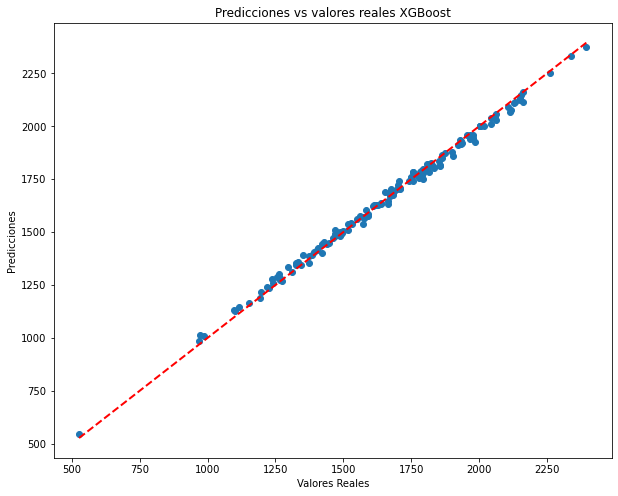

In [8]:
#plot para observar cómo se comportan las estimaciones sobre los valores reales 
plt.figure(figsize=(10, 8))
plt.scatter(y, preds)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs valores reales XGBoost')
plt.show()

In [9]:
#leemos el dataset de test
test = pd.read_excel('05_model_input/test.xlsx')

In [10]:
#generamos las predicciones para el dataset de respuesta
pred = xgb.predict(test)
pred

array([1832.7567, 1465.8201, 1625.6299, 1562.3757, 1819.2781, 1722.0841,
       1568.4897, 1383.963 , 1764.3358, 1217.2249, 1273.9608, 1619.9159,
       1509.409 , 1644.0924, 1730.1638, 1462.2437, 1693.576 , 1589.1348,
       1722.3948, 1400.8456, 1519.6025, 1512.316 , 1435.9604, 1656.4551,
       1789.7639, 1673.8041, 1834.9203, 1716.2666, 1790.149 , 1928.3208,
       1487.1849, 1746.2025, 1646.9642, 1782.1357, 1647.8369, 1515.2437,
       1473.0859, 1539.3694, 1628.0936, 1583.8391, 1625.5132, 1521.4225,
       1765.6564, 1348.1958, 1443.7191, 1574.8461, 1760.9016, 1614.2554,
       1672.3287, 1490.3324, 1780.57  , 1800.9269, 1831.5887, 1480.4714,
       1745.235 , 1797.8905], dtype=float32)